In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
df = pd.read_csv("Advertising.csv")  
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
x = df["TV"].astype(float).values
y = df["Sales"].astype(float).values

n = len(x)
x_mean = x.mean()
y_mean = y.mean()

print(n)
print(x_mean)
print(y_mean)

200
101.89
12.08


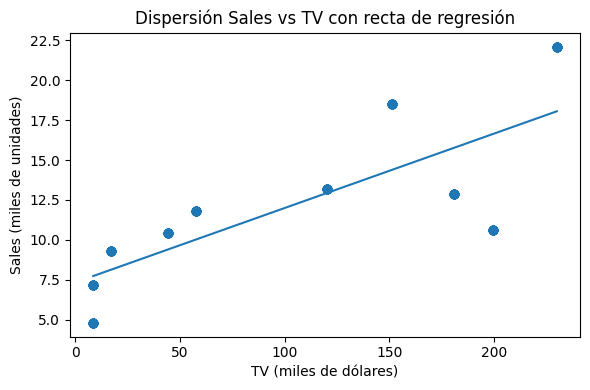

In [7]:
Sxx = np.sum((x - x_mean)**2)
Sxy = np.sum((x - x_mean)*(y - y_mean))
beta1 = Sxy / Sxx
beta0 = y_mean - beta1 * x_mean

plt.figure(figsize=(6,4))
plt.scatter(x, y)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = beta0 + beta1 * x_line
plt.plot(x_line, y_line)
plt.xlabel("TV (miles de dólares)")
plt.ylabel("Sales (miles de unidades)")
plt.title("Dispersión Sales vs TV con recta de regresión")
plt.tight_layout()
plt.show()

In [4]:
# Cálculo manual equivalente
Syy = np.sum((y - y_mean)**2)
r = Sxy / np.sqrt(Sxx * Syy)
r

np.float64(0.7769242755776288)

In [5]:
beta0, beta1

(np.float64(7.334018424710768), np.float64(0.04657946388545718))

In [7]:
y_hat = beta0 + beta1 * x
resid = y - y_hat

SSE = np.sum(resid**2)           # Sum of Squared Errors
SST = np.sum((y - y_mean)**2)    # Total Sum of Squares
SSR = SST - SSE                  # Regression Sum of Squares

R2 = SSR / SST
MSE = SSE / (n - 2)              # Error cuadrático medio (estimado con df = n-2)

R2, MSE

(np.float64(0.6036113299818231), np.float64(9.3361943959756))

In [8]:
df_reg = 1
df_res = n - 2
df_tot = n - 1

MSR = SSR / df_reg
MSE = SSE / df_res
F = MSR / MSE

anova = pd.DataFrame({
    "Fuente": ["Regresión", "Residual", "Total"],
    "df":     [df_reg, df_res, df_tot],
    "SS":     [SSR,     SSE,    SST],
    "MS":     [MSR,     MSE,    "" ],
    "F":      [F,       "",     "" ]
})
anova

,Fuente,df,SS,MS,F
0,Regresión,1,2814.95351,2814.95351,301.509736
1,Residual,198,1848.56649,9.336194,
2,Total,199,4663.52000,,


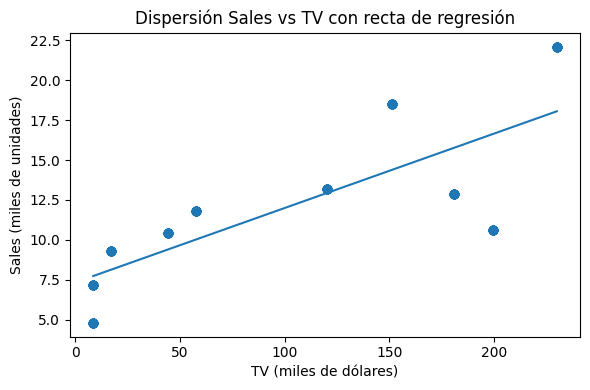

In [9]:
plt.figure(figsize=(6,4))
plt.scatter(x, y)
plt.plot(x_line, y_line)
plt.xlabel("TV (miles de dólares)")
plt.ylabel("Sales (miles de unidades)")
plt.title("Dispersión Sales vs TV con recta de regresión")
plt.tight_layout()
plt.savefig("scatter_tv_sales.png", dpi=200)

In [10]:
print(f"n = {n}")
print(f"Modelo: Sales = {beta0:.4f} + {beta1:.4f}·TV")
print(f"r = {r:.4f}")
print(f"R^2 = {R2:.4f}")
print(f"SST = {SST:.6f} | SSR = {SSR:.6f} | SSE = {SSE:.6f}")
print(f"MSE = {MSE:.6f}")
print(f"F = {F:.4f}")

n = 200
Modelo: Sales = 7.3340 + 0.0466·TV
r = 0.7769
R^2 = 0.6036
SST = 4663.520000 | SSR = 2814.953510 | SSE = 1848.566490
MSE = 9.336194
F = 301.5097
